# Calculus

In this lesson, I'll cover the basics of the calculus of a single variable. Calculus is often divided into different areas, those being:

- Infinitesimals: How to manipulate numbers that are infinitely small or infinitely large.
- Differentiation: How one variable changes continuously in response to one or more other variables.
- Integration: How to add up infinitely many small numbers to get a finite number.

Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *
import warnings

warnings.filterwarnings('ignore')

## Infinitesimal Calculus

### Infinitesimals

Perhaps most fundamental to what calculus is is the idea of an infinitely small number, usually called an *infinitesimal*. A positive **infinitesimal** is a *hyperreal number* $\varepsilon$ that's much smaller than any positive real number $x$,

$$0 < \varepsilon \ll x.$$

A negative infinitesimal is defined similarly, except with the signs all flipped, $x \ll \varepsilon < 0$. I say "hyperreal number" because infinitesimals aren't technically real numbers. They extend the number line in a sense. Thankfully we won't really have to worry about this technical distinction in this book. 

For practical purposes, think of infinitesimals as a really, really small numbers. When we say infinitesimal in practice, we usually mean a really small number like $\varepsilon = 10^{-10}$. This means $\varepsilon^2 = 10^{-20}$. If we take say $x=1$, then $\varepsilon=10^{-10}$ is really small compared to $x$, but $\varepsilon^2 = 10^{-20}$ is really really small compared to $x$, so small that it might as well be zero,

$$\varepsilon^2 \approx 0.$$

A computer wouldn't even be able to tell the difference really between $x$ and $x + \varepsilon^2$.

In [2]:
x = 1
epsilon = np.float64(1e-10)
print(f'x = {x}')
print(f'epsilon = {epsilon}')
print(f'x + epsilon = {1 - epsilon}')
print(f'epsilon^2 = {epsilon ** 2}')
print(f'x + epsilon^2 = {1 - epsilon ** 2}')

x = 1
epsilon = 1e-10
x + epsilon = 0.9999999999
epsilon^2 = 1.0000000000000001e-20
x + epsilon^2 = 1.0


To see an example of how to work with infinitesimals, let's try to simplify the expression $(1 + \varepsilon)^n$, assuming $\varepsilon$ is some infinitesimal added to $1$, and $n$ is some positive integer. If we expand out the product in powers of $\varepsilon$, we'd have

$$(1 + \varepsilon)^n = (1 + \varepsilon) (1 + \varepsilon) \cdots (1 + \varepsilon) = 1 + n\varepsilon + \frac{1}{2}n(n-1)\varepsilon^2 + \cdots + \varepsilon^n.$$

Now, since $\varepsilon^2 \approx 0$, all the powers of order $\varepsilon^2$ or higher vanish, so we're just left with

$$(1 + \varepsilon)^n \approx 1 + n\varepsilon.$$

This neat little approximation is called the **binomial approximation**. In fact, it holds for any real number $n$, not just positive integers.

### Infinitely Large Numbers

The inverse of an infinitesimal must evidently be a really big number $N = \frac{1}{\varepsilon}$. These are called *infinitely large* numbers. Technically speaking, a positive **infinitely large** number is a hyperreal number that's much larger than any positive real number $x$,

$$0 \leq x \ll N.$$

Similarly for infinitely large negative numbers, we'd have $N \ll x < 0$.

If in practice we'd think of an infinitesimal as a tiny number like $\varepsilon = 10^{-10}$, we'd think of an infinitely large number a really big number like $N=10^{10}$. If $N$ is really big, then $N^2$ is really really big, so big that it might as well be infinity,

$$N^2 \approx \infty.$$

If $x=1$, then $x + N \approx N$. As far as a computer is concerned you can't really even tell the difference.

In [3]:
x = 1
N = np.float64(1e10)
print(f'x = {x}')
print(f'N = {N}')
print(f'x + N = {1 + N}')
print(f'N^2 = {N ** 2}')
print(f'x + N^2 = {1 + N ** 2}')

x = 1
N = 10000000000.0
x + N = 10000000001.0
N^2 = 1e+20
x + N^2 = 1e+20


### Continuity

Calculus is mainly concerned with the study of functions that are *continuous*. Informally speaking, a function is continuous if its graph has no breaks in it. You could draw the graph on a piece of paper without lifting your pen.
A better way of saying the same thing is that each point on the graph always has points infinitesimally close to it.

Formally speaking, we'd say a function $y=f(x)$ is **continuous** at a point $a$ if $f(x)$ is infinitesimally close to $f(a)$ whenever $x$ is infinitesimally close to $a$. That is, any points nearby $a$ must get mapped to points nearby $f(a)$. The function itself is called continuous if it's continuous for *every* choice of $a$.

Just about every function you're familiar with is continuous. Constant functions, linear functions, affine functions, polynomials, exponentials, logarithms, roots, they're all continuous. There are no breaks in their graphs.

One example of a function that *is not* continuous is the step function $y=u(x)$ given by,

$$y =
\begin{cases}
1, & x \geq 0 \\
0, & x < 0. \\
\end{cases}
$$

This function is continuous for every $x \neq 0$, but at $x=0$ there's a discontinuous jump from $y=0$ to $y=1$. If I pick any negative $x$ infinitesimally close to $0$ it'll have $f(x)=0$, which is not infinitesimally close to $f(0)=1$.

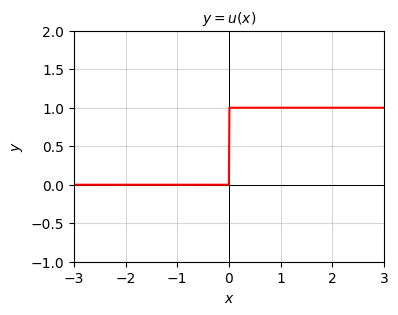

In [4]:
#| fig-align: center
x = np.arange(-10, 10, 0.01)
f = lambda x:  (x >= 0)
plot_function(x, f, xlim=(-3, 3), ylim=(-1, 2), ticks_every=[1, 0.5], 
              title='$y=u(x)$')

Step type functions aren't the only examples of discontinuous functions though. Any function with a *pole* or *asymptote* will have a discontinuity at those points. For example, the rational function

$$y=\frac{x^3+x+1}{x^2-1}.$$

evidently has poles at $x = \pm 1$, which means the function will be discontinuous at these two points. Everywhere else it's continuous.

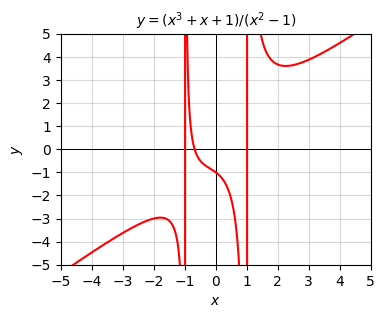

In [5]:
#| fig-align: center
x = np.arange(-10, 10, 0.01)
f = lambda x: (x ** 3 + x + 1) / (x ** 2 - 1)
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), ticks_every=[1, 1], 
              title='$y = (x^3 + x + 1) / (x^2 - 1)$')

In practice these continuity distinctions usually don't matter a whole lot. Step functions and rational functions are continuous *almost everywhere*. For all but a small handful of values everything's fine and we can apply calculus as usual. However, there are pathological cases out there of functions that are *nowhere continuous*. An example might be any function generated by a random number generator. The points never connect. They're all over the place. Functions like these we wouldn't try to treat using calculus, at least directly.

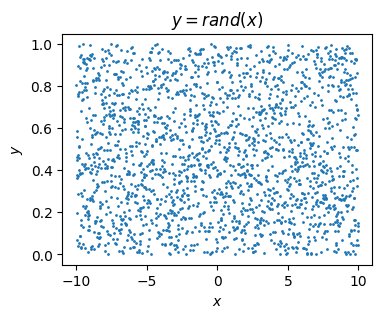

In [6]:
x = np.arange(-10, 10, 0.01)
f = lambda x: np.random.rand(len(x))
plt.figure(figsize=(4, 3))
plt.scatter(x, f(x), s=1)
plt.title('$y=rand(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Limits

For historical reasons, most modern calculus books don't talk about infinitesimals or infinitely large numbers at all. It's not because they're not rigorous, at least anymore. It mostly has to do with the history of calculus. For a long time people had a hard time rigorously pinning down what exactly these infinitely small numbers were. To get around this, in the 19th century many mathematicians started to think instead in terms of [limits](https://en.wikipedia.org/wiki/Limit_(mathematics)). 

In the language of infinitesimals, we'd say that the **limit** of a function $y=f(x)$ as $x$ approaches some value $a$ is the value $L$ such that

$$L \approx f(a + \varepsilon),$$

where $\varepsilon$ is any nonzero infinitesimal added to $a$. Said differently, $f(x) \approx L$ whenever $x \approx a$ but $x \neq a$. Limits are usually written with the notation

$$\lim_{x \rightarrow a} f(x) = L.$$

In the language of limits, we'd think of $x$ being some value that gets closer and closer to $a$, which then causes $f(x)$ to get closer and closer to $L$. This is a more dynamic view of calculus, where you imagine values moving towards a point instead of just nudging that point by some really small value.

I personally find that the language of limits tends to complicate understanding of calculus. Anything phrased in terms of limits pretty much can be more easily phrased in terms of infinitesimals. Nevertheless, it's good to know how to calculate limits. For continuous functions it's easy. As long as $a$ is a finite value and $f(x)$ is continuous at $x=a$, then the limit is just given by plugging in $f(a)$ directly, i.e.

$$\lim_{x \rightarrow a} f(x) = f(a).$$

For example, suppose we wanted to take the limit of $y = x^3 - 10x^2$ as $x \rightarrow 1$. Since this function is continuous, the limit would be

$$\lim_{x \rightarrow 1} (x^3 - 10x^2) = 1^3 - 10 \cdot 1^2 = 1 - 10 = -9.$$

When the function isn't continuous you have to be more careful and actually add an infinitesimal to $a$ to see what the function is doing nearby. It may be the case that what the function is doing to the left at $a-\varepsilon$ is different from what the function is doing to the right at $a+\varepsilon$. In that case the ordinary limit doesn't exist and we have to talk about *one-sided* limits. I won't spend time on these.

Another important case not covered by just plugging in $f(a)$ directly is when we're interested in *infinite limits*. That is, when $x \rightarrow \infty$ or $x \rightarrow -\infty$. In these cases we have to plug in an infinitely large number $N$ and look at what's happening as $N$ gets really big. For example, suppose we wanted to take the limit of $y = x^3 - 10x^2$ as $x \rightarrow \infty$. If we plug an infinitely large number into this function we'd get $f(N) = N^3 - 10N^2$. Since $N^3 \gg N^2$ when $N$ is really big, we'd have $f(N) \approx N^3$. This is a cubic function, which of course goes off to infinity as $N$ gets large. That is,

$$\lim_{x \rightarrow \infty} (x^3 - 10x^2) = \infty.$$

As a more interesting example, suppose we wanted to take the limit of the following rational function as $x \rightarrow \infty$,

$$y = \frac{7x^5 + x^3 - x + 1}{2x^5 - 3x^3 + x^2 - 4}.$$

If we plot this function, we can see that it's evidently approaching some finite value as $x$ gets large, something like $y = 3.5$.

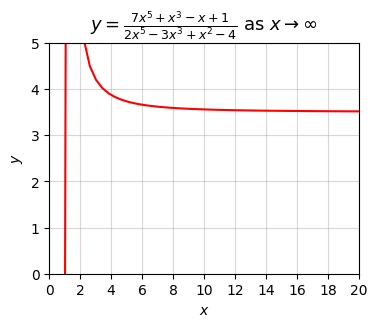

In [7]:
x = np.linspace(-20, 20, 100)
f = lambda x: (7 * x**5 + x**3 - x + 1) / (2 * x**5 - 3 * x**3 + x**2 - 4)
plot_function(x, f, xlim=(0, 20), ylim=(0, 5), ticks_every=[2, 1], title_fontsize=13,
              title='$y=\\frac{7x^5 + x^3 - x + 1}{2x^5 - 3x^3 + x^2 - 4}$ as $x \\rightarrow \infty$')

In fact, it goes like the ratio of the leading powers in the numerator and denominator. If $N$ is infinitely large, then

$$f(N) \approx \frac{7N^5}{2N^5} = \frac{7}{2} = 3.5.$$

This is a general fact for rational functions as $x \rightarrow \infty$. The final limit we seek is thus

$$\lim_{x \rightarrow \infty} \frac{7x^5 + x^3 - x + 1}{2x^5 - 3x^3 + x^2 - 4} = \frac{7}{2} = 3.5.$$

With infinite limits, when in doubt, plot the function and see if it's stabilizing to some value or going off to positive or negative infinity. Or just code up the function and plug in some large values. The vast majority of the time you'll get the right answer.

### Asymptotic Notation

At their core, infinitesimals and infinitely large numbers are most useful for getting approximations to functions. Infinitesimals are useful when we want to know how a function behaves near *zero*. Infinitely large numbers are useful when we want to know how a function behaves near *infinity*. We can use these two notions to define a convenient simplified notation called **asymptotic notation** or **big-O notation**. Asymptotic notation is used to give us a general idea how a function behaves in extreme limits. It ignores the finer details of the function and just focuses on its growth behavior. This notation is extremely pervasive across computer science and applied mathematics, and well worth being familiar with.

Suppose $f(x)$ is some function. We say $f(x) = O(g(x))$ *in the infinite limit* if for any infinitely large number $N$, $f(N)$ is bounded above by some real-valued constant multiple of $g(N)$,

$$f(N) \leq C \cdot g(N).$$

Informally, this says the graph of $f(x)$ lies under some constant multiple of the graph of $g(x)$ when $x$ is large. It doesn't mean that $C \cdot g(x)$ is *always* bigger than $f(x)$. It means that if $x$ increases *eventually* there will come a point where $C \cdot g(x)$ is bigger than $f(x)$.

Similarly, we say $f(x) = \mathcal{O}(h(x))$ *in the zero limit* if for any infinitesimal $\varepsilon$, $f(\varepsilon)$ is bounded above by some real-valued constant multiple of $g(\varepsilon)$,

$$f(\varepsilon) \leq C \cdot h(\varepsilon).$$

Informally, this says the graph of $f(x)$ lies under some constant multiple of the graph of $h(x)$ when $x$ is small. Again, it doesn't mean that $C \cdot g(x)$ is *always* bigger than $f(x)$. It means that if $x$ gets smaller and smaller, *eventually* there will come a point where $C \cdot g(x)$ is bigger than $f(x)$.

Let's look at a simple example. Consider the cubic function

$$f(x) = x^3 + 2x^2 - x + 2.$$

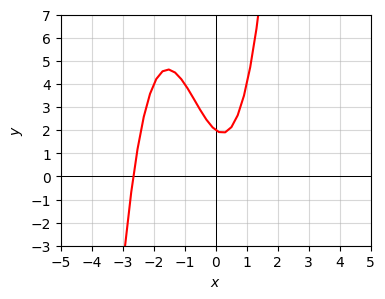

In [8]:
x = np.linspace(-10, 10, 100)
f = lambda x: x**3 + 2 * x**2 - x + 2
plot_function(x, f, xlim=(-5, 5), ylim=(-3, 7), ticks_every=[1, 1])

Let's first ask what the function is doing as $x$ gets *infinitely large*. It should be pretty clear from the graph that it's shooting up to infinity. But how fast? Take $N$ to be infinitely large. Then

$$f(N) = N^3 + 2N^2 - N - 1.$$

Now, if $N$ is infinitely large, then $N$ will be huge compared to $1$, but $N^2$ will be big compared to $N$ too, and $N^3$ will be big compared to $N^2$. That is,

$$N^3 \gg N^2 \gg N \gg 1.$$

If we approximate the function with its *highest order* term, we just have

$$f(N) \approx N^3.$$

That is, near infinity, $f(x)$ grows like the ordinary cubic function $g(x) = x^3$. But is there some constant $C$ we can scale $g(x)$ by so that $f(N) \leq C \cdot g(x)$? Yes there is. Observe that near infinity we have

$$f(N) = N^3 + 2N^2 - N - 1 \leq N^3 + 2N^3 + N^3 + N^3 = 5N^3.$$

That is, if $C=5$, then $f(N) \leq C \cdot g(x)$. In the infinite limit we thus have

$$x^3 + 2x^2 - x + 2 = O(x^3).$$

This is just a fancy way of saying that our function $f(x)$ lies on or below the curve $y=5x^3$ when $x$ gets really big.

Let's now ask what the function is doing as $x$ becomes *infinitesimal*. It looks like it takes on the value $y=-1$ at $x=0$. To see what the function is doing *near* zero, we can look at $y=f(\varepsilon)$ assuming $\varepsilon$ is infinitesimal,

$$f(\varepsilon) \approx \varepsilon^3 + 2\varepsilon^2 - \varepsilon + 2.$$

Now, if $\varepsilon$ is tiny, then $\varepsilon^2$ is really tiny, and $\varepsilon^3$ is really really tiny. That is,

$$\varepsilon^3 \ll \varepsilon^2 \ll \varepsilon \ll 1.$$

If we approximate the function with its *lowest order* term, we just have

$$f(\varepsilon) \approx 2.$$

That is, very close to zero the function behaves like the constant function $h(x) = 2$. Since we can just write $2 = 2 \cdot 1$, we might as well factor the $2$ into the constant $C$ and just take $h(x) = 1$. Then in the zero limit we have

$$x^3 + 2x^2 - x + 2 = \mathcal{O}(1).$$

This just says that our function $f(x)$ lies on or below the line $y=2$ when $x$ gets close to zero. Notice that you could've also gotten the same result by just evaluating $f(0)$ directly to get $f(0) = 2$. This is because this particular function is *continuous*.

Here's a plot so you can see what's going on here. Notice that near zero, $f(x) \leq 2.5 \cdot h(x) = 2.5$, and near infinity $f(x) \leq 3 \cdot g(x) = 3x^3$.

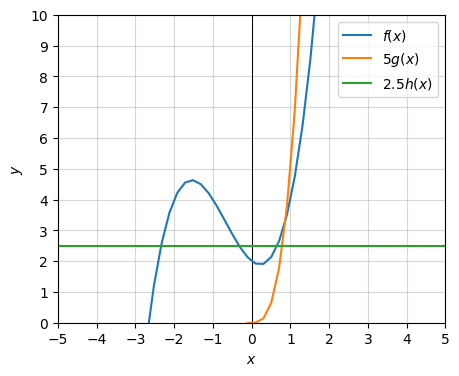

In [9]:
x = np.linspace(-10, 10, 100)
f = lambda x: x**3 + 2 * x**2 - x + 2
g_inf = lambda x: 5 * x**3
g_0 = lambda x: 2.5 + 0 * x
plot_function(x, [f, g_inf, g_0], xlim=(-5, 5), ylim=(0, 10), ticks_every=[1, 1], figsize=(5, 4),
              labels=['$f(x)$', '$5g(x)$', '$2.5 h(x)$'])

What I've just shown more or less holds true for *any* polynomial. If $f(x) = a_0 + a_1 x + \cdots + a_n x^n$ is some degree $n$ polynomial, then in the *infinite limit* the *highest degree term* dominates, i.e. $f(x) = O(x^n)$. In the *zero limit* the *lowest degree term* dominates, i.e. $f(x) = \mathcal{O}(1)$ provided $a_0 \neq 0$. If you remember nothing else about asymptotic notation, at least remember these two facts. 

The same rule holds not just for polynomials, but for any function of powers, including rational and root functions. The most important difference here is that the lowest degree term won't usually be a constant. It'll be the term with the most negative power. For example, in the zero limit

$$\sqrt{10 x} + x^{3/2} + \frac{7}{x^3} = \mathcal{O}\bigg(\frac{1}{x^3} \bigg).$$

Exponential and logarithmic functions lie on the extremes of the polynomials. In the infinite limit, the function $f(x) = e^x$ will be larger than *any* power of $x$. On the other hand, the log function $f(x) = \log x$ grows *slower* than any power of $x$. The trig functions $f(x) = \sin x$ and $f(x) = \cos x$ are both of order one in both limits since they're always bounded by $y=\pm 1$.

Here are a few more general examples of working with asymptotic notation in both limits.

| <div style="width:250px"></div>| <div style="width:100px"></div>| <div style="width:100px"></div>|
|:-----------------------------------|:--------------------------------|:--------------------------------------|
| **Function** | **Infinite Limit** | **Zero Limit** |
| $f(x)=100$ | $O(1)$ | $O(1)$ |
| $f(x)=-x^4 + 2x^3 + 4x^2 + 8x + 16$ | $O(x^4)$ | $\mathcal{O}(1)$ |
| $f(x)=4x^5 + 3x^4 + 2x^3 + x^2 + x$ | $O(x^5)$ | $\mathcal{O}(x)$ |
| $f(x)=\sqrt{10 x} + x^{3/2} + \frac{7}{x^3}$ | $O(x^{3/2})$ | $\mathcal{O}\big(\frac{1}{x^3} \big)$ |
| $f(x)=10 e^x + 100 x^{1000} + x^3$ | $O(e^x)$ | $\mathcal{O}(x^3)$ |
| $f(x)=\log 50x - 5 x + 30 x^2$ | $O(x^2)$ | $\mathcal{O}(\log x)$ |

When in doubt, when you want to figure out the asymptotic behavior of a function, plot it and see what it's doing in the limit of interest. Here's a plot of some common functions, zoomed out so we can get an idea of the infinite limit. Notice how exponential function quickly out-grows everything else. Next come the polynomials and roots ordered by the highest powers. Then the logarithms. Then the constant functions. And finally the negative powers.

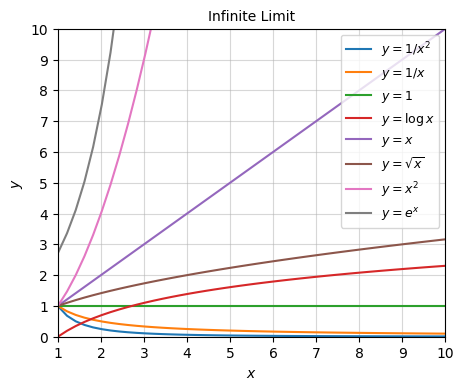

In [10]:
#| fig-align: center
x = np.linspace(0, 20, 100)
fs = [lambda x: 1 / x**2,
      lambda x: 1 / x,
      lambda x:  0 * x + 1,
      lambda x:  np.log(x), 
      lambda x:  x,
      lambda x: np.sqrt(x),
      lambda x:  x ** 2, 
      lambda x:  np.exp(x)]
plot_function(x, fs, xlim=(1, 10), ylim=(0, 10), ticks_every=[1, 1], figsize=(5, 4),
              title='Infinite Limit', legend_loc='upper right', legend_fontsize=9,
              labels=['$y = 1/x^2$',
                      '$y = 1/x$',
                      '$y=1$', 
                      '$y = \log x$', 
                      '$y = x$',
                      '$y = \sqrt{x}$',
                      '$y=x^2$',
                      '$y = e^x$'])

And here's a plot of the same functions, zoomed in near zero to get an idea of the zero limit. Notice now how everything's flipped around. It's the negative powers that are the largest, followed by constant functions, then logs, then powers and roots. The exponential is the smallest one.

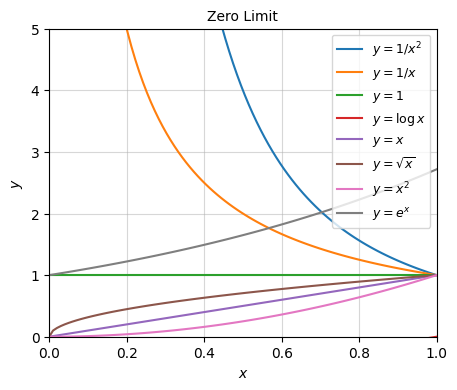

In [11]:
#| fig-align: center
x = np.linspace(0, 1, 100)
fs = [lambda x: 1 / x**2,
      lambda x: 1 / x,
      lambda x:  0 * x + 1,
      lambda x:  np.log(x), 
      lambda x:  x,
      lambda x: np.sqrt(x),
      lambda x:  x ** 2, 
      lambda x:  np.exp(x)]
plot_function(x, fs, xlim=(0, 1), ylim=(0, 5), ticks_every=[0.2, 1], figsize=(5, 4),
              title='Zero Limit', legend_loc='upper right', legend_fontsize=9,
              labels=['$y = 1/x^2$',
                      '$y = 1/x$',
                      '$y=1$', 
                      '$y = \log x$', 
                      '$y = x$',
                      '$y = \sqrt{x}$',
                      '$y=x^2$',
                      '$y = e^x$'])

Note that frequently we omit which limit we're talking about when we use asymptotic notation, assuming that it's understood which limit we're using in a given context. For example, when talking about the runtime, FLOPs, or memory of an algorithm, it's always understood we're in the *infinite limit*. When we're talking about approximation errors or the convergence of numerical algorithms it's understood we're in the *zero limit*. In this book, I'll use the italic big-O $O(\cdot)$ to refer to the infinite limit, and the script big-O $\mathcal{O}(\cdot)$ to refer to the zero limit. Usually you'll be able to tell which I'm talking about by the context.

## Differential Calculus

### Differentials and Derivatives

To make it easier to tell what's an infinitesimal with respect to what in a function, we often use the notation of *differentials*. If $x$ is some variable, we'd denote any infinitesimal added to it by the symbol $dx$, called the **differential** of $x$. If $y=f(x)$ is some function of $x$, then the differential with respect to $y$ is the amount that $y$ changes if we change $x$ to $x+dx$,

$$dy = f(x+dx) - f(x).$$

If it helps, you can think of $dx$ as meaning "a little bit of $x$", and $dy$ as meaning "a little bit of $y$".

Let's look at an example. Suppose $y=x^2$. What is $dy$? Evidently, we'd have

$$dy = f(x + dx) - f(x) = (x+dx)^2 - x^2 = (x^2 + 2xdx + dx^2) - x^2 = 2xdx + dx^2.$$

This is how much $y$ changes if we change $x$ by $dx$. Now, if $dx$ is infinitesimal, $dx^2 \approx 0$, which means

$$dy \approx 2xdx.$$

Notice how if $dx$ is infinitesimal, then $dy$ will evidently be an infinitesimal too. If we change $x=1$ by a really small amount $dx=10^{-10}$, then we'd change $y=x^2=1$ by $dy=2xdx=2 \cdot 10^{-10}$, which is also a really small change.

The ratio of these differentials says something about the rate that $y$ changes if we change $x$. It's called the *derivative* of $y=x^2$,

$$\frac{dy}{dx} = 2x.$$

Notice that the derivative is not itself infinitesimal since all the differentials are on the left-hand side. It's a real number, on the same scale as $x$ and $y$.

Of course, we can calculate these things numerically too. We just have to be careful about floating point roundoff. Since we're subtracting two numbers that are almost equal we'll inevitably get a lot of roundoff if we make $dx$ too small. When coding these things you have to be careful about how small you choose $dx$. I'll take $dx=10^{-5}$ here. If the calculation were exact, we'd expect to get

$$dy=2xdx = 2 \cdot 10^{-5} = 0.00002.$$

But evidently we don't get this exactly. In fact, since $dx^2 = 10^{-10}$, we should expect to start seeing errors around 10 decimal places due to $dx$ not being exactly infinitesimal, which is what we're seeing here.

In [12]:
dx = 1e-5
x = 1
y = 1 ** 2
dy = (1 + dx) ** 2 - y
print(f'dy = {dy}')
print(f'dy/dx = {dy / dx}')

dy = 2.0000100000139298e-05
dy/dx = 2.00001000001393


Let's do another example. Suppose we have the function $y = x^3$. Then we'd have

$$dy = f(x+dx) - f(x) = (x+dx)^3 - x^3 = (x^3 + 3x^2 dx + 3 x dx^2 + dx^3) - x^3 = 3x^2 dx + 3 x dx^2 + dx^3.$$

If $dx$ is infinitesimal, then $dx^2 \approx 0$, which also means $dx^3 \approx 0$. Thus, if $x$ changes by a small amount $dx$, then $y=x^3$ changes by an amount

$$dy = 3x^2 dx.$$

The derivative of $y=x^3$ is again just the ratio of differentials,

$$\frac{dy}{dx} = 3x^2.$$

Here's a numerical calculation to verify this fact. I'll again choose $x=1$ and $dx=10^{-5}$. We should expect to get $dy =3 \cdot 10^{-5}$ and $\frac{dy}{dx} = 3$. To within an error of about $dx^2=10^{-10}$ it seems we do.

In [13]:
dx = 1e-5
x = 1
y = 1 ** 3
dy = (1 + dx) ** 3 - y
print(f'dy = {dy}')
print(f'dy/dx = {dy / dx}')

dy = 3.0000300001109537e-05
dy/dx = 3.000030000110953


In both examples, the amount that $y$ changes if $x$ changes by $dx$ is evidently just the derivative times $dx$,

$$dy = \frac{dy}{dx} dx.$$

The notation makes this fact look pretty trivial, since we can imagine canceling the $dx$ terms on the right to get $dy$. In fact, that's exactly what we're doing.

In general, if $y=f(x)$ is some function that's reasonably well-behaved at a point $x$, then the **differential** of $y$ at that point is

$$dy = f(x+dx) - f(x),$$

and the **derivative** of $y=f(x)$ at that point is given by

$$\frac{dy}{dx} = \frac{f(x+dx) - f(x)}{dx}.$$

This will only be exact when $dx$ is infinitesimal, otherwise we'd have an error on the order of $dx^2$. Notice that both the differential and the derivative are themselves functions of $x$. For this reason, it's common to think of $\frac{d}{dx}$ is some kind of derivative operator and write

$$\frac{dy}{dx} = \frac{d}{dx} f(x), \quad \text{or} \quad \frac{dy}{dx} = f'(x).$$

What exactly did I mean when I said the function $f(x)$ needs to be "reasonably well behaved" at the point $x$? For one thing, the function needs to be **continuous**. Continuity is what ensures that $dy = f(x+dx) - f(x)$ will be infinitesimal whenever $dx$ is infinitesimal. However, continuity is just a *necessary condition* for $f(x)$ to be differentiable. What's important is that the ratio 

$$\frac{dy}{dx} = \frac{f(x+dx) - f(x)}{dx}$$

should be a well-defined ratio of infinitesimals at $x$. This won't be the case, for example, at points where there are kinks in the function's graph. A major example of this is the ReLU function, which has a kink at $x=0$. In practice though these kinks aren't a huge problem. For example, for *convex* functions like the ReLU, we can slightly extend the notion of a derivative to the notion of a [subderivative](https://en.wikipedia.org/wiki/Subderivative).

Here's a quick python function `diff` that can numerically calculate the derivative of some function $f(x)$ at a point $x$.

In [14]:
def diff(f, x, dx=1e-5):
    dy = f(x + dx) - f(x)
    return dy / dx

f = lambda x: x ** 2
dydx = diff(f, 1)
print(f'dy/dx = {dydx}')

dy/dx = 2.00001000001393


Calculating the derivative this way is called **numerical differentiation**. It turns out, you can reduce the error in numerical differentiation calculations a lot by centering the difference estimate for $dy$,

$$dy=\frac{f\big(x+\frac{dx}{2}\big)-f\big(x-\frac{dx}{2}\big)}{2}.$$ 

It's equivalent to the above function when $dx$ is infinitesimal, but when it's not it reduces the error by a factor of $dx$.

### Interpreting Derivatives

Since $dy$ is the change in $y$ in response to the change in $x$ by $dx$, the derivative $\frac{dy}{dx}$ evidently represents some kind of a *rate*. It's the rate that $y$ changes in response to small changes in $x$.

Depending on what exactly $y$ and $x$ are we can think of the derivative as representing many different things. Here are some examples:

- If $x$ is the position of some particle and $t$ is time, $\frac{dx}{dt}$ represents the *speed* or *velocity* of that particle at time $t$.
- If $p$ is the pressure in the atmosphere at a height $z$ from the Earth's surface, then $\frac{dp}{dz}$ represents the *pressure gradient*, a measure of how much pressure varies with altitude.
- If $q$ is the quantity of some economic good and $p$ is the price of that good, then $\frac{dq}{dp}$ represents the *elasticity* of that good, i.e. how responsive the good's quantity is to changes in its price.
- If $C$ is the cost of some good and $q$ is the amount of that good we have, then $\frac{dC}{dq}$ represents the *marginal cost* of that good. It's the amount we'd have to pay to get one more unit of that good.
- If $L$ is the loss function of some machine learning algorithm and $\theta$ is some parameter of the model, then $\frac{dL}{d\theta}$ represents the *loss gradient*, a measure of how sensitive the loss is to changes in that particular parameter.

The derivative also has a useful interpretation when thinking about a function graphically. It represents the *slope* of a function $y=f(x)$ at the point $x$. This follows from the fact that

$$dy = \frac{dy}{dx} dx.$$

If we relax the requirement that $dx$ be infinitesimal, then it's just the difference between two finite points, say $dx = x - a$. That means $dy$ is also the difference between two points $f(x) - f(a)$. If we plug these into the above formula and solve for $f(x)$, we get

$$f(x) \approx f(a) + \frac{d}{dx} f(a) (x - a).$$

If we think of $a$ as some fixed point and $x$ as a variable, this is just the equation for a line. It's a line passing through the point $(a, f(a))$ with a slope $\frac{d}{dx} f(a)$. This line is called the **tangent line** of the function at the point $a$. To see why let's do a quick example.

Suppose again that $y=x^2$. If we take $a=1$, then $f(a) = 1$ and $\frac{d}{dx} f(a) = 2a = 2$, so we have an equation

$$y \approx 1 + 2(x - 1) = 2x - 1.$$

Let's plot this line along with the function itself to see what's going on. Notice the tangent line is hugging the function at the red point $a=1, f(a)=1$, and that the slope of the line seems to hug the curve at that point. This is what it means to say that the derivative is the slope of a function at a point. It's the slope of the tangent line passing through that point.

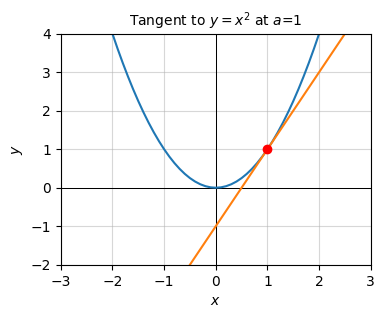

In [15]:
#| fig-align: center
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

a = 1
x = np.arange(-3, 3, 0.1)
f_line = lambda x: f(a) + dfdx(a) * (x - a)

plot_function(x, [f, f_line], points=[[a, f(a)]], xlim=(-3, 3), ylim=(-2, 4),
              title=f'Tangent to $y=x^2$ at $a$={a}')

Notice a curious fact from this slope interpretation. At the minimum value of the function, in this case at $x=0$, the slope is flat, which evidently implies that the derivative at the minimum is zero. We'll exploit this fact in a future lesson when we talk about optimization.

Another way to interpret the equation 

$$f(x) \approx f(a) + \frac{d}{dx} f(a) (x - a)$$

is that the right-hand side is the best linear approximation of the function at the point $x=a$. Provided $x \approx a$, we can well-approximate $f(x)$ by its tangent line. Another way of saying the same thing is that if we zoom in enough on the plot we can't tell that the function isn't linear.

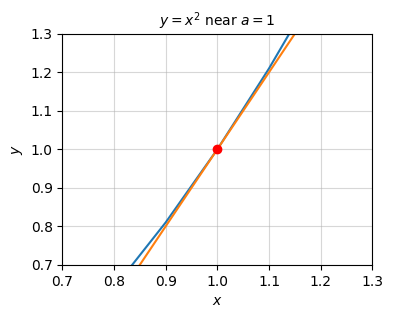

In [16]:
#| fig-align: center
plot_function(x, [f, f_line], points=[[a, f(a)]], xlim=(0.7, 1.3), ylim=(0.7, 1.3),
              title=f'$y=x^2$ near $a=1$')

### Second Derivatives

Differentials and derivatives cover the situation when we're interested in changes in a function that are *first-order* in $dx$. But suppose we're interested in changes that are *second-order* in $dx$? This leads us to the notion of second differentials. If $dx^2$ is a second-order differential change in $x$, then $d^2y = d(dy)$ is a second-order differential change in $y=f(x)$. Using the fact that $dy=f(x+dx)-f(x)$, it's not too hard to show that

$$d^2 y  = f(x+dx)-2f(x)+f(x-dx).$$

The ratio of second differentials is called the **second derivative** of $y$ with respect to $x$,

$$\frac{d^2 y}{dx^2} = \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}.$$

As with the first derivative $\frac{dy}{dx}$, this equality will only be exact when $dx$ is infinitesimal. Otherwise there will be an error of order $dx^3$.

Let's do a quick example. Consider again the cubic function $y=x^3$. I already showed its first derivative is the function $\frac{dy}{dx} = 3x^2$. Let's see what its second derivative is. Evidently, for $d^2y$ we have

\begin{align*}
d^2 y &= f(x+dx)-2f(x)+f(x-dx) \\
&= (x+dx)^3 - 2x^3 + (x-dx)^3 \\
&= (x^3 + 3x^2dx + 3xdx^2 + dx^3) - 2x^3 + (x^3 - 3x^2dx + 3xdx^2 - dx^3) \\
&= 6xdx^2.
\end{align*}

Dividing both sides by $dx^2$, the second derivative of $y=x^3$ is evidently just $\frac{d^2 y}{dx^2} = 6x$. We can actually see this in a simpler way. Notice that

$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx}.$$

That is, it's just the derivative of the derivative. Since we already knew $dy = 3x^2dx$ and $d(x^2)=2xdx$, we could just have done

\begin{align*}
d^2 y = d(dy) &= d(3x^2dx) \\
&= 3d(x^2)dx \\
&= 3(2xdx)dx \\
&= 6xdx^2. \\
\end{align*}

Just like the first derivative is a function of $x$, so is the second derivative. For this reason we'd also often write it as

$$\frac{d^2 y}{dx^2} = \frac{d^2}{dx^2} f(x) = f''(x).$$

To see how the second derivative arises we need to ask what happens if we want to approximate a function $y=f(x)$ not just with a line, but with a parabola. It turns out that if we want to approximate the function with a parabola about some point $x=a$ we'd use something like this,

$$f(x) \approx f(a) + \frac{d}{dx} f(a) (x - a) + \color{red}{\frac{1}{2} \frac{d^2}{dx^2} f(a) (x - a)^2}\color{black}.$$

The new term is shown in red. It's quadratic in $x-a$ and proportional to the second derivative of $y=f(x)$ at the point $a$. We can imagine writing it in a form

$$y = A(x-a)^2 + B(x-a) + C.$$

This gives the equation of a parabola with vertex at $\big(a-\frac{B}{2A}, \big(a-\frac{B}{2A}\big)^2\big)$. Evidently, the *curvature* of the parabola is determined by the coefficient $A = \frac{1}{2} \frac{d^2}{dx^2} f(a)$. This means that the second derivative is a measure of the function's *curvature* around a point. The larger the second derivative is, the steeper the parabola at that point will be, and hence the steeper the function's curvature will be around $x=a$.

Here's an example. Suppose we have the function $y = x^3 + 5x^2$, and we wanted to approximate the function with a parabola about the point $x=1$. The approximating parabola turns out to be

$$y = 8(x - 1)^2 + 13(x - 1) + 6.$$

The plot of the function and the approximating parabola is shown below.

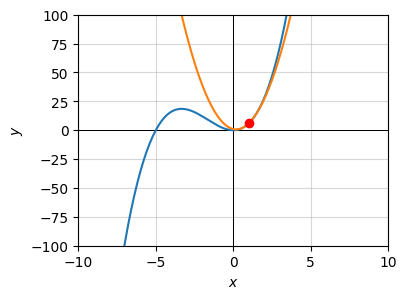

In [17]:
#| fig-align: center
f = lambda x: x ** 3 + 5 * x ** 2
dfdx = lambda x: 3 * x ** 2 + 10 * x
d2fdx2 = lambda x: 6 * x + 10

a = 1
x = np.arange(-50, 50, 0.1)

f_parabola = lambda x: f(a) + dfdx(a) * (x - a) + 1/2 * d2fdx2(a) * (x - a) ** 2

plot_function(x, [f, f_parabola], points=[[a, f(a)]], xlim=(-10, 10), ylim=(-100, 100),
              title=f'')

While this looks like a bad approximation when $x$ is far away from $x=1$, especially if $x$ is negative, if we zoom in closer to $x=1$ we see that it actually does a very good job of approximating the function locally. In the range $[0.5, 1.5]$ you can't even really tell the function isn't parabolic.

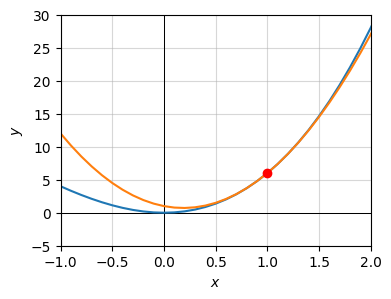

In [18]:
#| fig-align: center
plot_function(x, [f, f_parabola], points=[[a, f(a)]], xlim=(-1, 2), ylim=(-5, 30),
              title=f'')

The sign of the second derivative at $x=a$ says something about which way the function is curving. If the second derivative is positive, the function is curving *upward* around $x=a$. If the second derivative is negative, the function is curving *downward* at $x=a$. In the edge case where the second derivative is zero you can't tell. You have to go to higher order terms and look at the sign of those.

If we interpret the first derivative as some kind of *rate*, then we'd have to interpret the second derivative as a rate of a rate, or an *acceleration*. For example, if $y$ was the position of an object, then the first derivative $\frac{dy}{dx}$ would represent its speed or velocity, while the second derivative $\frac{d^2y}{dx^2}$ would represent the object's acceleration at a given point in time.

There are higher-order differentials and derivatives as well. We can take third differentials, fourth differentials, and so on. Fortunately, these higher terms don't really seem to show up in machine learning, so it's not worth going into them. 

I'll just briefly mention a nice fact. For many functions in practice, we can keep doing the kind of approximation I've been doing indefinitely for higher and higher derivatives. If we take infinitely many terms we get what's called the **Taylor Series Expansion** of $y=f(x)$ about $x=a$,

$$f(x) = \sum_{n=0}^\infty \frac{1}{n!} \frac{d^n}{dx^n} f(a) (x-a)^n = f(a) + \frac{d}{dx} f(a) (x - a) + \frac{1}{2} \frac{d^2}{dx^2} f(a) (x - a)^2 + \frac{1}{6} \frac{d^3}{dx^3} f(a) (x - a)^3 + \cdots$$

By taking more and more terms in the Taylor Series we can get a better and better approximation of a function about a point $x=a$ by using higher and higher degree polynomials. Note that when infinitely many terms are used the equality becomes exact. It's only approximate if we ignore higher-order terms.

### Differentiation Rules

It would be useful to have a systematic way to calculate differentials and derivatives without having to go back to the definition each time or always do it numerically. In this section I'll show some rules that makes this kind of thing much easier.

To start with, I'll list the differentials and derivatives of some common functions. I won't torture you by deriving all of these one-by-one.

| <div style="width:200px"></div>| <div style="width:200px"></div>| <div style="width:200px"></div>|
|:-----------------------------------|:--------------------------------|:--------------------------------------|
| **Function** | **Differential** | **Derivative** |
| $y = 0$ | $dy = 0$ | $\frac{dy}{dx} = 0$ |
| $y = 1$ | $dy = 0$ | $\frac{dy}{dx} = 0$ |
| $y = x$ | $dy = dx$ | $\frac{dy}{dx} = 1$ |
| $y = x^n$ | $dy = nx^{n-1}dx$ | $\frac{dy}{dx} = nx^{n-1}$ |
| $y = \sqrt{x}$ | $dy = \frac{dx}{2\sqrt{x}}$ | $\frac{dy}{dx} = \frac{1}{2\sqrt{x}}$ |
| $y = \frac{1}{x}$ | $dy = -\frac{dx}{x^2}$ | $\frac{dy}{dx} = -\frac{1}{x^2}$ |
| $y = e^x$ | $dy = e^xdx$ | $\frac{dy}{dx} = e^x$ |
| $y = \log{x}$ | $dy = \frac{dx}{x}$ | $\frac{dy}{dx} = \frac{1}{x}$ |
| $y = \sin{x}$ | $dy = \cos{x}dx$ | $\frac{dy}{dx} = \cos{x}$ |
| $y = \cos{x}$ | $dy = -\sin{x}dx$ | $\frac{dy}{dx} = -\sin{x}$ |
| $y = \sigma(x)$ | $dy = \sigma(x)\big(1-\sigma(x)\big)dx$ | $\frac{dy}{dx} = \sigma(x)\big(1-\sigma(x)\big)$ |
| $y = \tanh(x)$ | $dy = \big(1 - \tanh^2(x)\big)dx$ | $\frac{dy}{dx} = 1 - \tanh^2(x)$ |
| $y = \text{ReLU}(x)$ | $dy = u(x)dx = [x \geq 0]dx$ | $\frac{dy}{dx} = u(x) = [x \geq 0]$ |

Let's now look at some general rules for differentials and derivatives. The most fundamental rule is that these things are *linear*. That is, if $a, b$ are constant real numbers and $u, v$ are functions,

$$d(au + bv) = adu + bdv, \quad \text{and} \quad \frac{d(au+bv)}{dx} = a \frac{du}{dx} + b \frac{dv}{dx}.$$

It's pretty easy to see this. Suppose $f(x) = au(x) + bv(x)$. Then we'd have

\begin{align*}
d(au + bv) &= f(x + dx) - f(x) \\
&= \big(au(x+dx) + bv(x+dx)\big) - \big(au(x) + bv(x)\big) \\
&= a \big(u(x+dx) - u(x) \big) + b \big(v(x+dx) - v(x) \big) \\
&= adu + bdv.
\end{align*}

For example, that if we have the function $y = 5\sin x + 10x^2 - 4$, then we can write

$$dy = d(5\sin x + 10x^2 - 4) = 5d(\sin x) + 10d(x^2) - 4d(1) = 5\cos x dx + 20xdx + 0dx,$$

or dividing both sides by $dx$,

$$\frac{dy}{dx} = 5\cos x + 20x.$$

If we wanted, we could take the second derivative just as easily,

$$d^2y = d(5\cos x \cdot dx + 20xdx) = 5dx \cdot d(\cos x) + 20dx^2 = -5\sin x \cdot dx^2 + 20 dx^2,$$

which means

$$\frac{d^2y}{dx^2} = -5\sin x + 20.$$

Sympy can do all this for you. You'll first need to define a variable `x`, then define `y` as a function of `x`. Once you've done this, you can get the first derivative with `y.diff(x)`, and the second derivative with `y.diff(x).diff(x)`.

In [19]:
x = sp.Symbol('x')
y = 5 * sp.sin(x) + 10 * x ** 2  - 4
dydx = y.diff(x)
d2dx2 = y.diff(x).diff(x)
print(f'y = {y}')
print(f'dy/dx = {dydx}')
print(f'd2y/dx2 = {d2dx2}')

y = 10*x**2 + 5*sin(x) - 4
dy/dx = 20*x + 5*cos(x)
d2y/dx2 = 20 - 5*sin(x)


Here's a more interesting example that shows we can take differentials of any equation. It need not even be a single-valued function $y=f(x)$. Any function of the form $g(x,y)=0$ will do. Suppose we have the equation $x^2+y^2=1$. This is the equation for a circle of radius 1. Taking the differential of both sides and solving for $dy$, we have

\begin{align*}
d(x^2 + y^2) &= d(1) \\
d(x^2) + d(y^2) &= 0 \\
2xdx + 2ydy &= 0 \\
dy &= -\frac{x}{y}dx.
\end{align*}

Evidently the slope of a circle changes like $\frac{dy}{dx} = -\frac{x}{y}$. Since the differential of a constant is always zero, this will be true for a circle of *any* radius.

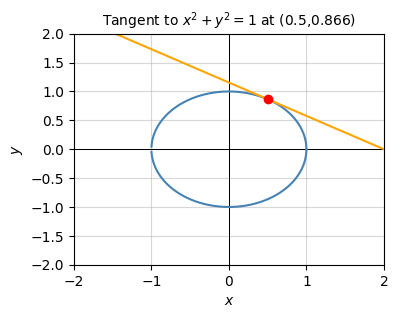

In [20]:
#| fig-align: center
f1 = lambda x: np.sqrt(1 - x ** 2)
f2 = lambda x: -np.sqrt(1 - x ** 2)
dfdx1 = lambda x: -x / f1(x)
dfdx2 = lambda x: -x / f2(x)

a = 0.5
ya = f1(a)
x = np.arange(-2, 2, 0.001)
if ya >= 0:
    f_line = lambda x: ya + dfdx1(a) * (x - a)
else:
    f_line = lambda x: ya + dfdx2(a) * (x - a)

plot_function(x, [f1, f2, f_line], points=[[a, ya]], xlim=(-2, 2), ylim=(-2, 2),
              colors=['steelblue', 'steelblue', 'orange'], 
              title=f'Tangent to $x^2+y^2=1$ at ({round(a, 3)},{round(ya, 3)})')

Another useful rule that differentials and derivatives follow is the **product rule**. If $u$ and $v$ are two functions, then the differential of their product $y=uv$ is

$$d(uv) = udv + vdu.$$

It's pretty easy to see that this is true as well. If we nudge $y$ a little bit to $y+dy$, then we necessarily must nudge $u$ to some $u+du$ and $v$ to some $v+dv$. This means we have

\begin{align*}
dy = d(uv) &=  (u+du)(v+dv) - uv \\
&=  (uv + udv + vdu + dudv) - uv \\
&\approx  udv + vdu, \\
\end{align*}

where the last step follows provided $dudv \approx 0$, which will be true if both $du$ and $dv$ are infinitesimal. Dividing both sides by $dx$ gives the derivative equivalent,

$$\frac{d(uv)}{dx} = u\frac{dv}{dx} + v\frac{du}{dx}.$$

As an example, suppose we had the function $y=x^2e^x$. Setting $u=x^2$ and $v=e^x$, we'd have

$$dy = d(uv) = udv + vdu = x^2 d(e^x) + e^x d(x^2) = x^2 e^x dx + 2xe^x dx.$$

Dividing both sides by $dx$ then gives the derivative, $\frac{dy}{dx} = x^2 e^x + 2xe^x$.

In [21]:
x = sp.Symbol('x')
y = x ** 2 * sp.exp(x)
dydx = y.diff(x)
print(f'y = {y}')
print(f'dy/dx = {dydx}')

y = x**2*exp(x)
dy/dx = x**2*exp(x) + 2*x*exp(x)


Suppose we have a function $y=\frac{u}{v}$ that's a quotient of two functions $u$ and $v$. To find $dy$, can write this as $y=uv^{-1}$ and use the product rule,

$$dy = d(uv^{-1}) = ud(v^{-1}) + v^{-1}du = -\frac{udv}{v^2} + \frac{du}{v} = \frac{vdu - udv}{v^2}.$$

This is called the **quotient rule**,

$$d\bigg(\frac{u}{v}\bigg) = \frac{vdu - udv}{v^2}.$$

Again, dividing both sides by $dx$ gives the quotient rule for derivatives,

$$\frac{dy}{dx} = \frac{v\frac{du}{dx} - u\frac{dv}{dx}}{v^2}.$$

As an example, suppose we wanted to differentiate $y=\frac{12e^x + 1}{x^2 + 1}$. Taking $u=12e^x + 1$ and $v=x^2 + 1$, we'd have

$$dy = \frac{vdu - udv}{v^2} = \frac{(x^2 + 1)d(12e^x + 1) - (12e^x + 1)d(x^2 + 1)}{(x^2 + 1)^2} = \frac{12e^x(x^2 + 1)dx - 2x(12e^x + 1)dx}{(x^2 + 1)^2}.$$

Or dividing both sides by $dx$,

$$\frac{dy}{dx} = \frac{12e^x(x^2 + 1) - 2x(12e^x + 1)}{(x^2 + 1)^2}.$$

In [22]:
x = sp.Symbol('x')
y = (12 * sp.exp(x) + 1) / (x ** 2 + 1)
dydx = y.diff(x)
print(f'y = {y}')
print(f'dy/dx = {dydx}')

y = (12*exp(x) + 1)/(x**2 + 1)
dy/dx = -2*x*(12*exp(x) + 1)/(x**2 + 1)**2 + 12*exp(x)/(x**2 + 1)


The last rule I'll mention is by far the most important one to know for machine learning purposes. It's called the **chain rule**. Suppose we had a composite function $y = f(g(x))$, or equivalently $y=g(z)$ and $z=f(x)$. Then taking differentials we'd get

$$dy = \frac{dy}{dz} dz = \frac{dy}{dz} \frac{dz}{dx} dx.$$

Dividing both sides by $dx$ gives the derivative version,

$$\frac{dy}{dx} = \frac{dy}{dz} \frac{dz}{dx}.$$

The notation makes this look trivial since it seems like all we're doing is multiplying and dividing by $dz$. But the chain rule is a pretty deep fact. It says if we have a complicated function we can always break it up into easier composite functions, differentiate those, then multiply the results together.

Here's an example. Suppose we had a function $y = e^{-\frac{1}{2} x^2}$. This looks pretty complicated but it's not. Notice we can think about this as a composition of the form $y = e^z$ where $z = -\frac{1}{2} x^2$. Differentiating each of these on their is easy,

\begin{align*}
dy &= d(e^z) = e^z dz, \\
dz &= d\bigg(-\frac{1}{2} x^2\bigg) = -xdx. \\
\end{align*}

If we want to differentiate $y$ with respect to $x$ we just need to multiply these two together and substitute in for $z$,

$$dy = \frac{dy}{dz} \frac{dz}{dx} dx = e^z (-x) dx = -x e^{-\frac{1}{2} x^2} dx,$$

or again dividing both sides by $dx$,

$$\frac{dy}{dx} = -x e^{-\frac{1}{2} x^2}.$$

In [23]:
x = sp.Symbol('x')
y = sp.exp(-sp.Rational(1, 2) * x ** 2)
dydx = y.diff(x)
print(f'y = {y}')
print(f'dy/dx = {dydx}')

y = exp(-x**2/2)
dy/dx = -x*exp(-x**2/2)


What really makes the chain rule powerful for machine learning is that we can use it on arbitrarily many composition chains. For example, if we have a composition of three functions $y=f(u)$, $u=g(z)$, $z=h(x)$, we'd have

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dz} \frac{dz}{dx}.$$

More generally, if we had a complicated function of $n$ compositions

\begin{align*}
y_0 &= x, \\
y_1 &= f_1(y_0), \\
y_2 &= f_2(y_1), \\
\vdots & \qquad \vdots \\
y_n &= f_n(y_{n-1}), \\
y &= y_n, \\
\end{align*}

the chain rule would say

$$\frac{dy}{dx} = \prod_{i=1}^n \frac{dy_i}{dy_{i-1}} = \frac{dy}{dy_{n-1}} \frac{dy_{n-1}}{dy_{n-2}} \cdots \frac{dy_2}{dy_1} \frac{dy_1}{dx}.$$

This fact is fundamental to how a neural network is trained. At each step of training a neural network, we have to *backpropagate* through the neural network to calculate $\frac{dy}{dx}$. All backpropogation is is the chain rule, where each term in the chain is a layer in the neural network. It's probably no exaggeration to say that deep learning works as well as it does *because* of the ability of the chain rule to make calculating the derivative of complicated composite functions easy.

The last rule I'll mention is a method to calculate the derivative of an inverse function. Suppose $y=f(x)$. If the function is invertible, we can solve for $x$ and get an inverse function $x = f^{-1}(y)$. The inverse rule says if we know the derivative of one of these we can easily get the derivative of the other by inverting it,

$$\frac{dx}{dy} = \frac{1}{\frac{dy}{dx}}.$$

Again, the notation makes this look pretty trivial. What's not said is that in going from one to the other we have to be careful what's a function of what. On the left-hand side, $x$ is a function of $y$, but on the right-hand side $y$ is a function of $x$.

For example, suppose we had the function $y=e^x$ and for some reason wanted to know $\frac{dx}{dy}$. What we can do is calculate $\frac{dy}{dx} = e^x$, and invert it to get $\frac{dx}{dy}$,

$$\frac{dx}{dy} = \frac{1}{\frac{dy}{dx}} = \frac{1}{e^x} = \frac{1}{y}.$$

Of course, this is just the derivative of the logarithm function $x = \log y$, which makes sense since $x=\log y$ is the inverse of $y=e^x$.

Here's a summary table of all these rules for reference. I'll state them in derivative form and provide an example of each one for later reference.

| <div style="width:200px"></div>| <div style="width:300px"></div>| <div style="width:300px"></div>|
|:---------|:---------|:------------|
| **Name** | **Rule** | **Example** |
| Linear Rule | $\frac{d}{dx}(au + bv) = a\frac{du}{dx} + b\frac{dv}{dx}$ | $\frac{d}{dx}(2x^2 + 5\log x) = 2\frac{d}{dx}x^2 + 5\frac{d}{dx}\log x = 4x + \frac{5}{x}$ |
| Product Rule | $\frac{d}{dx}(uv)=u\frac{dv}{dx} + v\frac{du}{dx}$ | $\frac{d}{dx}(x e^x) = x \frac{d}{dx}e^x + e^x \frac{d}{dx} x = xe^x + e^x$ |
| Quotient Rule | $\frac{d}{dx}\big(\frac{u}{v}\big) = \frac{v\frac{du}{dx}-u\frac{dv}{dx}}{v^2}$                      | $\frac{d}{dx} \frac{\cos x}{x^2} = \frac{x^2\frac{d}{dx}\cos x-\cos x\frac{d}{dx}x^2}{(x^2)^2} = \frac{-x^2 \sin x - 2x \cos x}{x^4}$ |
| Chain Rule | $\frac{dy}{dx} = \frac{dy}{dz}\frac{dz}{dx}$ | $\frac{d}{dx} e^{\sin x} = \frac{d}{dy} e^y \frac{d}{dx}\sin x = e^{\sin x} \cos x$ |
| Inverse Rule | $\frac{dx}{dy} = \frac{1}{\frac{dy}{dx}}$ | $y = 5x + 1 \quad \Longrightarrow \quad \frac{dx}{dy} = \frac{1}{\frac{dy}{dx}} = \frac{1}{5}$ |

## Integral Calculus

By far, differential calculus is the most important area of calculus to know for machine learning purposes. The main reason for this is that in machine learning we seek to train models by optimizing functions, and (as I'll cover in a future lesson) optimization is all about taking derivatives. 

Nevertheless, integral calculus is the giant other half of calculus, so I owe it to at least briefly cover the subject. Knowing a little about integration will also make it easier to understand the later lessons on probability theory and distributions.

We can think about integral calculus in two distinct ways that turn out to be linked together by an important theorem. One way of thinking about an integral is as an inverse operation that undoes differentiation. The other way of thinking about an integral is as sum of a bunch of infinitesimal segments.

### Indefinite Integration

Suppose we knew that some function $F(x)$ had a derivative of $f(x)$, i.e.

$$f(x) = \frac{d}{dx} F(x).$$

If we only knew $f(x)$, how would we go about "undoing" the differentiation to get back $F(x)$? Essentially what we'd need to do is work backward.

For example, suppose we knew $f(x)=x$. How could we find $F(x)$? Well, we already know that $\frac{d}{dx} x^2 = 2x$. If we divide both sides of this equation by $2$ we've evidently got $F(x)$, i.e. $F(x) = \frac{1}{2} x^2$. Strictly speaking, this is only *one* possible solution. We could add any constant to $F(x)$ and not change the answer since the derivative of a constant is zero.

The function $F(x)$ is called the **indefinite integral** of $f(x)$. In textbooks it's sometimes also called an *antiderivative* since it undoes the derivative operation. For reasons I'll explain soon, we usually write the indefinite integral using a funny notation,

$$F(x) = \int f(x) dx.$$

For example, if $f(x) = x$, we'd write

$$\int x dx = \frac{1}{2} x^2.$$

The function on the right is the $F(x)=\frac{1}{2} x^2$ that undoes the function inside the integral, namely $f(x)=x$.

As far as interpreting what an indefinite integral is, if you think of $f(x)$ as the rate of some thing, then $F(x)$ tells you the aggregate total of that thing. For example, if $f(x)$ was the speed of an object as a function of time, then its integral $F(x)$ would tell you how far that object has moved as a function of time. If $f(x)$ was the demand of some good as a function of price, then $F(x)$ would be the *consumer surplus* of that good, or how much consumers benefit from being able to buy that good for cheaper than they were willing to pay.

We could go through and figure out what the indefinite integral is one-by-one for the common functions we've seen so far, but I'll spare you the detail. They're given in the table below.

| <div style="width:200px"></div>| <div style="width:200px"></div>|
|:---------------------------------------|:-----------------------------------------|
| **Function** | **Integral** |
| $y = 0$ | $\int y dx = 0$ |
| $y = 1$ | $\int y dx = x$ |
| $y = x$ | $\int y dx = \frac{1}{2}x^2$ |
| $y = \sqrt{x}$ | $\int y dx = \frac{2}{3} x^{3/2}$ |
| $y = \frac{1}{x}$ | $\int y dx = \log{x}$ |
| $y = x^n$ where $n \neq -1$ | $\int y dx = \frac{1}{n+1}x^{n+1}$ |
| $y = e^x$ | $\int y dx = e^x$ |
| $y = \log{x}$ | $\int y dx = x \log{x} - x$ |
| $y = \sin{x}$ | $\int y dx = -\cos{x}$ |
| $y = \cos{x}$ | $\int y dx = \sin{x}$ |

By construction, the indefinite integral is the inverse operation of the derivative operation. This means they cancel each other,

$$d\bigg(\int f(x) dx\bigg) = f(x) dx, \quad \text{and} \quad \int dF(x) = \int \frac{d}{dx} F(x) dx = F(x).$$

This fact is sometimes called the **Leibniz Rule**. It means that the indefinite integral inherits many of the properties of the derivative. Most importantly, it's *linear*. If $a$ and $b$ are constants, and $u$ and $v$ are two functions, then

$$\int \big(au + bv\big) dx = a \int u dx + b \int v dx.$$

For example, if $y = -x^3 + 7\sin x$, we'd have

$$\int y dx = \int (-x^3 + 7\sin x) dx = - \int x^3 dx + 6 \int \sin x dx = -\frac{1}{4} x^4 - 6 \cos x.$$

Again, you could technically add a constant to this answer and not change the result, but it's not typical to do this, at least outside of calculus textbooks.

As with differentiation, sympy can calculate these things for you. Just define `x` and `y`, then calculate the indefinite integral with `y.integrate(x)`.

In [24]:
x = sp.Symbol('x')
y = -x ** 3 + 7 * sp.sin(x)
int_y = y.integrate(x)
print(f'y = {y}')
print(f'int y dx = {int_y}')

y = -x**3 + 7*sin(x)
int y dx = -x**4/4 - 7*cos(x)


The integral version of the product rule is called **integration by parts**. If we start with the product rule,

$$d(uv) = udv + vdu,$$

and integrate both sides, we get

$$\int d(uv) = \int udv + \int vdu.$$

Since $uv = \int d(uv)$, we can re-arrange terms to get the rule for integration by parts,

$$\int u dv = uv - \int v du.$$

Actually using integration by parts to calculate things isn't often as straight forward as the product rule. To make integration by parts work in practice, you want to try to choose $u$ and $v$ so the right-hand side is easier to integrate than the left-hand side.

As a quick example, suppose we wanted to integrate $y = x e^x$. What we could do is take $u = x$ and $v=e^x$, so $du=dx$ and $dv = e^x dx$. Then we'd have

$$\int x e^x dx = x e^x - \int e^x dx = x e^x - e^x.$$

In [25]:
x = sp.Symbol('x')
y = x * sp.exp(x)
int_y = y.integrate(x)
print(f'y = {y}')
print(f'int y dx = {int_y}')

y = x*exp(x)
int y dx = (x - 1)*exp(x)


Though less widely known and rarely covered in textbooks for some reason, there's also an integration by parts for the quotient rule. Using the quotient rule

$$d\bigg( \frac{u}{v} \bigg) = \frac{vdu - udv}{v^2},$$

and integrating both sides, we get

$$\int d\bigg( \frac{u}{v} \bigg) = \int \frac{vdu - udv}{v^2} = \int \frac{1}{v}du + \int \frac{u}{v^2}dv.$$

Since $\frac{u}{v} = \int d\big(\frac{u}{v}\big)$ we can again rearrange terms to get

$$\int \frac{1}{v} du = \frac{u}{v} + \int \frac{u}{v^2} du.$$

Just as with the product integration by parts, using this in practice often involves reducing a complicated integral on the left-hand side to a less complicated integral on the right-hand side.

The integral version of the *chain rule* is called **change of variables** or **substitution**. Suppose we had a function $y=f(x)$ and wanted to integrate it. One thing we could do is make a change of variable by letting $x$ be a function of some other variable $u$, say $x = g(u)$. If we multiply and divide $f(x)dx$ by $du$, then

$$f(x) dx = f(g(u)) \frac{dx}{du} du.$$

Integrating both sides gives the change of variables formula,

$$\int f(x) dx = \int f(g(u)) \frac{dx}{du} du.$$

The left-hand side is integrated with respect to $x$, while the right-hand side is integrated with respect to $u$. Just like with integration by parts, using the change of variables formula in practice is more an art than a science. The tricky part is figuring out what $x=g(u)$ should be to make the integral easier to compute.

For example, suppose we wanted to integrate the function $y = x e^{x^2}$. What we could do is let $u=x^2$. Then $du=2xdx$, and so we'd have

$$\int x e^{x^2} dx = \int x e^{u} \frac{1}{2x} du = \frac{1}{2} \int e^u du = \frac{1}{2} e^u = \frac{1}{2} e^{x^2}.$$

In [26]:
x = sp.Symbol('x')
y = x * sp.exp(x ** 2)
int_y = y.integrate(x)
print(f'y = {y}')
print(f'int y dx = {int_y}')

y = x*exp(x**2)
int y dx = exp(x**2)/2


Here's a summary table of the integral rules I've covered so far.

| <div style="width:250px"></div>| <div style="width:250px"></div>| <div style="width:450px"></div>|
|:---------|:---------|:------------|
| **Name** | **Rule** | **Example** |
| Leibniz Rule | $\frac{d}{dx} \int y dx = y$ | $\frac{d}{dx} \int \sin t dt = \sin x$ |
| Linear Rule | $\int (au + bv) dx = a\int u dx + b\int v dx$ | $\int (-1 + 5e^x) dx = -\int 1 dx + 5\int e^x dx = -x + 5e^x$ |
| Integration By Parts (product version) | $\int u dv = uv - \int v du$ | $\int x e^x dx = \int x d(e^x) = x e^x - \int e^x dx = x e^x - e^x$ |
| Integration By Parts (quotient version) | $\int \frac{1}{v} du = \frac{u}{v} + \int \frac{u}{v^2} dv$ | $\int \frac{\sin \sqrt{x}}{x^2} dx = \frac{2\cos x^{-1/2}}{x^{1/2}} + \int x^{3/2} \cos x^{-1/2}dx = \frac{2\cos x^{-1/2}}{x^{1/2}} - 2 \sin x^{-1/2}$ |
| Change of Variables | $\int f(x) dx = \int f(g(u)) \frac{dx}{du} dx$ | $\int x e^{x^2} dx = \int e^{x^2} d\big(\frac{1}{2}x^2\big) = \frac{1}{2} \int e^u du = \frac{1}{2} e^u = \frac{1}{2} e^{x^2}$ |

Before moving on, I'll mention an important fact. While we can always take the derivative of a function and get a symbolic answer in terms of functions we're used to, this is not always possible with integrals. In fact, most integrals we can write down we can't evaluate using the methods covered here. There's no way to find an explicit $F(x)$ whose derivative is $f(x)$ in terms of simple functions. A classic example of this is the Gaussian function

$$y = e^{-x^2}.$$

There's no way you'd be able to integrate this symbolically and get a closed form solution in terms of simple functions. Unfortunately, this is the rule, not the exception. This fact often makes integration a lot harder than differentiation in practice. Fortunately, we can always evaluate an integral numerically, but I'll need to discuss the definite integral first so we can understand what that even means.

### Definite Integration

I said that integral calculus essentially consists of two things, finding functions that undo a derivative, and summing up infinitesimals. The first part I just covered, the indefinite integral. I'll now discuss the second part, and how it can be linked with the definite integral via the Fundamental Theorem of Calculus.

Suppose now we had a function $y=f(x)$ and we wanted to compute the area under this curve between two endpoints $x=a$ and $x=b$. So we have a working example, suppose the function is $y=\sqrt{x}$ and we want to find the area under its curve from $x=0$ to $x=10$.

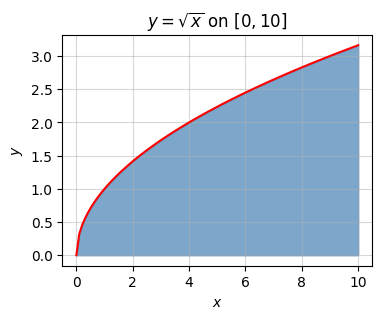

In [27]:
#| fig-align: center
f = lambda x: np.sqrt(x)
x = np.linspace(0, 10, 100)
a, b = 0, 10
plot_function_with_area(x, f, a=a, b=b, title='$y=\sqrt{x}$ on $[0,10]$')

If you had to estimate the area of something like this with no prior knowledge, what you might do is try to approximate the area by using a shape you already know how to find the area of. Perhaps the easiest thing to try would be a rectangle. Suppose we took a rectangle whose base was length $10$ and whose height was $\sqrt{10}$. Then very roughly speaking we could claim the area $A$ under the curve is

$$A \approx 10 \cdot \sqrt{10} \approx 31.62.$$

But this actually isn't a great estimate. Here's what we just calculated the area of. Notice how much area above the curve we're taking with this estimate. We're over-estimating the true area by a good bit it seems. How can we improve this estimate?

Approximate Area: 31.622776601683796


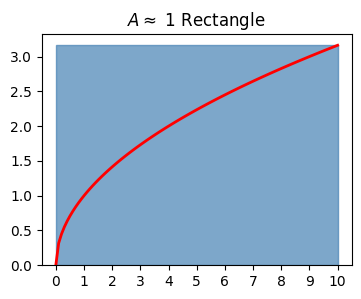

In [28]:
#| fig-align: center
plot_approximating_rectangles(x, f, dx=10, title='$A \\approx$ 1 Rectangle', alpha=0.7)

One thing we could do is use not one rectangle, but two rectangles. Suppose we took each rectangle to have half the width of the curve, say $dx=5$. The left rectangle can have height $\sqrt{5}$, and the right can have height $\sqrt{10}$. If we sum up these two areas, we'd get

$$A \approx 5 \cdot \sqrt{5} + 5 \cdot \sqrt{10} \approx 26.99$$

Here's what this approximation looks like. It's clearly a lot better, but we're still over-estimating the area by a decent bit.

Approximate Area: 26.991728188340847


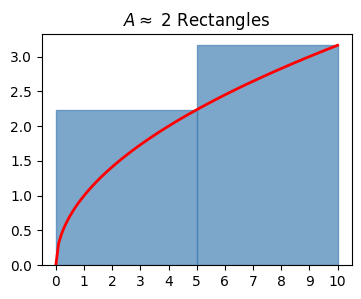

In [29]:
#| fig-align: center
plot_approximating_rectangles(x, f, dx=5, title='$A \\approx $ 2 Rectangles', alpha=0.7)

It seems like we can keep going with this strategy though. Let's try $N=10$ rectangles each of width $dx=1$. Call the areas of these $N$ rectangles in order $A_0, A_1, \cdots, A_{N-1}$. Each area will be a width $dx$ times a height $y_i=\sqrt{i+1}$. Thus, we have

\begin{align*}
A \approx \sum_{i=0}^{N-1} A_i &= \sum_{i=0}^{N-1} y_i dx \\
&= y_0dx + y_1dx + y_2dx + \cdots + y_9dx \\
&= \big(\sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10}\big)\cdot 1 \\
&\approx 22.468
\end{align*}

Here's what this approximation looks like. It's clearly a whole lot better. Notice how little extra area is left above the curve.

Approximate Area: 22.468278186204103


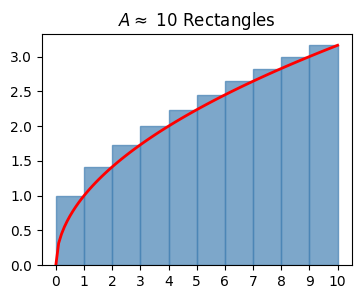

In [30]:
#| fig-align: center
plot_approximating_rectangles(x, f, dx=1, title='$A \\approx $ 10 Rectangles', alpha=0.7)

Now, it's fair to ask if this approximation will ever become *exact*. Can we eventually take enough rectangles such that $A = \sum y_i dx$ exactly? In fact we can. The trick is to allow the rectangle widths $dx$ to become infinitesimally thin. If we do that, while taking $N = \lfloor \frac{b-a}{dx} \rfloor$ rectangles, then $N$ will become infinitely large and we'll have an exact equality

$$A = \sum_{i=0}^{N-1} y_i dx.$$

Here's what this might look like. Notice how for all practical purposes it looks like we're calculating the area of the curve exactly now.

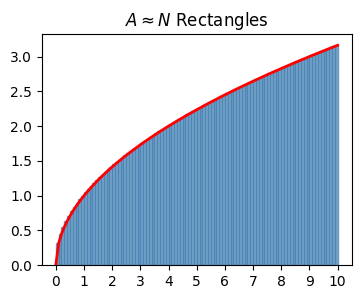

In [31]:
#| fig-align: center
plot_approximating_rectangles(x, f, dx=0.1, title='$A \\approx N$ Rectangles', alpha=0.7, print_area=False)

What I've just shown is that the exact area under the curve of a function $y=f(x)$ is the sum of an infinitely large number of rectangles of height $y_i=f(x_i)$ and infinitesimal width $dx$. For historical reasons we usually write a sum of infinitely many infinitesimals using a special notation,

$$\int_a^b y dx = \sum_{i=0}^{N-1} y_i dx.$$

This is called the **definite integral** of the function $y=f(x)$ from $x=a$ to $x=b$. Historically, the reason the $\int$ was chosen is because it looks kind of like the S in "summa", the Latin word for "sum". This makes it clear that an integral is just a sum, a sum of infinitely many infinitesimal quantities $ydx$.

Of course, this says nothing about how to actually calculate these things. We've got nothing to go on but the definition. For numerical purposes that's good enough. If we wanted to calculate a definite integral numerically, we could just take a bunch of really small rectangles like this and sum them up.

Below I'll define a function called `integrate` that will take in the function `f` and the endpoints `a` and `b`, and return the definite integral. Since it's just an area, the definite integral will always be a numerical value. I'll default `dx = 1e-4` to give a reasonable tradeoff between accuracy and speed.

I'll use this function to estimate the area of our running example, namely

$$A = \int_0^{10} \sqrt{x} dx.$$

Evidently, the exact area in this case seems to be about $A \approx 21.082$.

In [32]:
def integrate(f, a, b, dx=1e-4):
    N = int((b - a) / dx)
    interval = np.cumsum(dx * np.ones(N))
    rectangles = np.array([f(x - dx/2) * dx for x in interval])
    integral = np.sum(rectangles)
    return integral

f = lambda x: np.sqrt(x)
a, b = 0, 10
area = integrate(f, a, b)
print(f'A = {area}')

A = 21.081851128609895


This method of computing an integral is called **numerical integration**. We can actually improve the `integrate` function a lot by using $f\big(x - \frac{dx}{2}\big) dx$ for the rectangle areas instead of $f(x)dx$. This is sometimes called the *midpoint rule*. It's similar to differentiation, in that we improve convergence a lot by taking the midpoint function value instead of the right-most function value. As with differentiation, this centering trick reduces the error estimate by a factor of $dx$. Doing this will allow you to use a much larger $dx$ value to get the same desired accuracy.

While it may not be obvious, the formula I gave to calculate the area under the curve actually calculates what's called a *signed area*. That is, it counts area as positive when the curve is above the x-axis, and as negative when the curve is below the x-axis. To see this, notice if we took $y=-\sqrt{x}$, we'd have

$$\int_0^{10} y dx = - \int_0^{10} \sqrt{x} dx \approx -21.082.$$

Why? Because this curve lies below the x-axis on the interval $0 \leq x \leq 10$. This means the definite integral doesn't calculate the area per se. It subtracts the area above the x-axis with the area below the x-axis.

While we can always calculate definite integrals numerically, and in practice this is what you'd usually do, we can also derive a formula to calculate them exactly in many cases. This formula is important because it's what links together the indefinite integral with the definite integral, i.e. undoing the derivative with summing up infinitesimals areas. It's called the **Fundamental Theorem of Calculus**.

Suppose we had a function $F(x)$ whose derivative is $f(x)$. The fundamental theorem makes the following two claims:

1. For any left endpoint $a$, the definite integral is given by $$F(x) = \int_a^x f(t) dt + C,$$ where $C$ is some additive constant that depends only on $a$.
2. For any interval $a \leq x \leq b$, the area under the curve is given by $$\int_a^b f(x) dx = F(b) - F(a).$$

Note I had to use $t$ to represent the input variable in part (1) because I'm using $x$ as the right endpoint. The right endpoint and the integration variable are two different things, and you shouldn't confuse them. To see why (1) is true, suppose $A(x)$ is the area under the curve of $y=f(x)$ from $t=a$ to $t=x$, i.e.

$$A(x) = \int_a^x f(t) dt.$$

If we change the right endpoint $t=x$ by an infinitesimal amount $dx$, the area $A(x)$ evidently changes by an amount

$$dA = A(x + dx) - A(x) = \int_x^{x+dx} f(t) dt \approx f(x) dx.$$

The last equality follows from the fact that $dA$ is just the area of a single rectangle of width $dx$ and height $f(x)$. Since $dF = f(x)dx$ by definition, we thus have $dF = dA$, which means $F(x) = A(x) + C$, for some $C$ that doesn't depend on $x$. This shows part (1).

To show part (2), notice from (1) that I can write

$$F(b) - F(a) = \bigg(\int_a^b f(x) dx + C\bigg) - \bigg(\int_a^a f(x) dx + C\bigg) = \int_a^b f(x) dx.$$

The last equality follows from the fact that $\int_a^a f(x) dx$ is the area of a rectangle with no width, which must be zero. This shows part (2).

This theorem gives us an exact way to calculate the area under curves, provided we can evaluate the integral. For the previous example of finding the area under $f(x)=\sqrt{x}$ from $x=0$ to $x=10$, we'd have

\begin{align*}
\int_0^{10} \sqrt{x} dx &= \int_0^{10} x^{1/2} dx \\
&= \frac{x^{3/2}}{3/2} \ \bigg|_{x=0}^{x=10} \\
&= \frac{2}{3}x^{3/2} \ \bigg|_{x=0}^{x=10} \\
&= \frac{2}{3} 10^{3/2} - \frac{2}{3} 0^{3/2} \approx 21.082. \\
\end{align*}

The notation $F(x) \big|_{x=a}^{x=b}$ is a common shorthand for writing $F(b)-F(a)$ in integral calculations like this. You can also use sympy to calculate definite integrals like this via the method `y.integrate((x, a, b))`.

In [33]:
x = sp.Symbol('x')
y = sp.sqrt(x)
A = y.integrate((x, 0, 10))
print(f'A = {A} ≈ {A.round(3)}')

A = 20*sqrt(10)/3 ≈ 21.082


A couple more rules for the definite integral I'll mention involve the endpoints $a$ and $b$, called the **limits of integration**. Since all we're doing is summing up rectangles, we can always split up a sum over the interval $[a,b]$ into a sum over two subintervals $[a,c]$ and $[c,b]$. That is, if $y=f(x)$, then

$$\int_a^b y dx = \int_a^c y dx + \int_c^d y dx.$$

We can also swap the limits of integration if we agree on the convention that doing so flips the sign of the integral,

$$\int_a^b y dx = -\int_b^a y dx.$$

We can even have either limit be infinite, provided that it makes sense to integrate the function over an infinite interval. We can do so as long as the output isn't a NaN value like $\infty - \infty$. For technical reasons these types of integrals are sometimes called **improper integrals**.

For example, suppose we had the function $y=e^{-x}$. We can integrate this function from $a=0$ to $b=\infty$ just fine. First, notice that taking a change of variables $u=-x$ we get $du=-dx$, so

$$\int e^{-x} dx = -\int e^u du = -e^{u} = -e^{-x}.$$

Then the definite integral is just

$$\int_0^\infty e^{-x} dx = -e^{-x} \ \bigg |_{x=0}^{x=\infty} = -e^{-\infty} + e^{-0} = 1.$$

The last equality follows from the fact that $e^{-N} \approx 0$ when $N$ is infinitely large. Strangely, the area under the curve of this infinite graph is exactly one. Curves with area one are called probability density functions. They can be used to create probability distributions. I'll talk more on that in a few lessons.

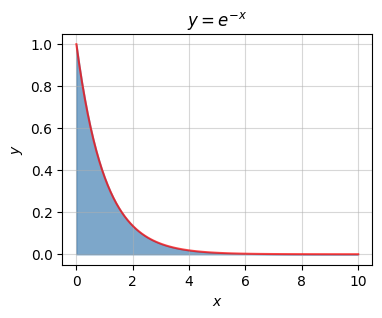

In [34]:
#| fig-align: center
f = lambda x: np.exp(-x)
x = np.linspace(0, 10, 100)
plot_function_with_area(x, f, a=0, b=10, title='$y=e^{-x}$', alpha=0.7)